# <center> Superstore Sales Dataset: Exploratory Data Analysis </center>
### <center> Liana Principe</center>
###### <center> Dataset provided by kaggle.com </center>

![shopping_photo](https://myareanetwork-photos.s3.amazonaws.com/editorphotos/f/38521_1574784413.jpg)

This dataset holds 4 years of retail data for an anonymous chain store with branches across the United States. This notebook specifically provides a preliminary account of Exploratory Data Analysis (EDA) for the chain store to gather a general understanding of patterns, trends, and how the data relates to each other. The exact contents of this notebook with links to specific sections is described in the index below.

### Index <a id='index'></a>
[Cleaning and Organizing the Dataset](#data_processing)
    
    - Null Values
    - Correlation Matrix


[Sales Over Time](#time_analysis)

    - Revenue and Number of Orders by Year
    - Yearly Average Revenue and Number of Orders by Month
    
[Sales by Geography](#sales_by_geo)

    - Sales by Region
    - Sales by State
    - Sales by City
    
[Shipping Patterns](#shipping_patterns)
    
    - Shipping Method Demographics
    - Shipping Demand by Month
    - Shipping Demand by Geography
    
[Inventory Category and Subcategory](#category_subcategory)

    - Category and Subcategory
    - Category and Subcategory Sales Timeline
    - Popular Product Names
    - Category and Subcategory by Region
    - Category and Subcategory by Shipping Method     

[Segment](#customer_seg)
    

#### Import packages and data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/liana.principe/Downloads/Superstore_original_data.csv')

In [2]:
#### Setting up the default parameters for matplotlib graph displays
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rcParams.update({'font.size': 18})
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Cleaning and Organizing the Dataset <a id='data_processing'> </a>

Minimal cleaning is necessary for this dataset. Below is a general summary of the steps taken to clean the dataset.

- Transforming Order and Ship Date to datetime format
- Creating new columns, isolating month and year data for easier filtering from Order and Ship date columns
- Transforming Zip Code column to string format
- Inputting proper zip code where necessary
- Correlation Matrix

After the cleaning process, a cleaned datafile (Superstore_cleaned) is filed and saved to be utilized in future analysis without having to repeat the whole cleaning process again.

In [4]:
# General Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [3]:
# Converting Date Columns to DateTime format in dataframe
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [4]:
# Creating new columns,isolating month and year data for easier filtering, changing numerical month to month_name
df['order_month'] = df['Order Date'].dt.month_name(locale='English')
df['order_month_n'] = df['Order Date'].dt.month
df['order_year'] = df['Order Date'].dt.year.astype(int)

df['ship_month'] = df['Ship Date'].dt.month_name(locale='English')
df['ship_month_n'] = df['Ship Date'].dt.month
df['ship_year'] = df['Ship Date'].dt.year.astype(int)


# Renaming Sales Column as Revenue to avoid confusion
df.rename({'Sales': 'Revenue'}, axis = 1, inplace = True)
df.drop('Row ID',axis = 1, inplace = True) #Dropping the Row ID column
df.set_index("Order Date", inplace = True)


In [5]:
# For easier reference if needed later on
months_abr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct',
              'Nov', 'Dec']
months=['January','February','March','April','May','June','July','August','September','October','November','December']

In [6]:
# Sorting the data by year, month, most recent years being first
df.sort_values(by=['Order Date'], inplace=True, ascending=True)
df_columns = df.columns
# Shows the years included in the dataset
years = df['order_year'].unique()
print('Timeframe: ',years)

Timeframe:  [2015 2016 2017 2018]


### Null Values

A general look at the column contents shows that there is a discrepency with the values in the zip codes column.

In [10]:
# looking For Null values
print(df.isnull().sum())

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Revenue           0
order_month       0
order_month_n     0
order_year        0
ship_month        0
ship_month_n      0
ship_year         0
dtype: int64


In [7]:
#Create a new dataframe of all rows with NaN in the Postal Code column
null_val  = df[df['Postal Code'].isnull()]

print(null_val[['City','State', 'Postal Code']])

                  City    State  Postal Code
Order Date                                  
2016-11-07  Burlington  Vermont          NaN
2016-11-08  Burlington  Vermont          NaN
2017-01-23  Burlington  Vermont          NaN
2017-01-23  Burlington  Vermont          NaN
2017-01-23  Burlington  Vermont          NaN
2017-04-06  Burlington  Vermont          NaN
2018-01-19  Burlington  Vermont          NaN
2018-01-19  Burlington  Vermont          NaN
2018-01-19  Burlington  Vermont          NaN
2018-01-19  Burlington  Vermont          NaN
2018-12-05  Burlington  Vermont          NaN


Looking closer at the NaN values shows that 11 rows with missing zip codes are all from Burlington, Vermont. Instead of dropping these rows, these zip codes will be inputed with the correct postal code which is 05401. Because this zip code has a leading zero, numerical formats will not support numbers that start with a zero. To fully input and save the Burlington zip code, the column type needs to be converted to string type.

In [8]:
#Converting the data type to be of string value
df['Postal Code'].astype('string')

#Fill NA values with the new postal code
df['Postal Code'] = df['Postal Code'].fillna('05401')
print(df.isnull().sum())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Revenue          0
order_month      0
order_month_n    0
order_year       0
ship_month       0
ship_month_n     0
ship_year        0
dtype: int64


### Correlation Matrix

C:\Users\liana.principe\AppData\Local\Temp\ipykernel_9576\3119417256.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='crest')


<Axes: >

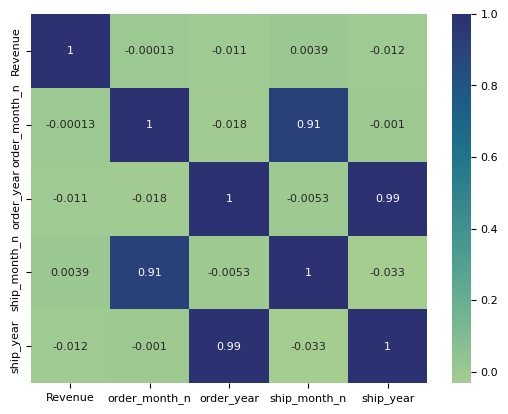

In [13]:
# Correlation Matrix to test alll numerical data
sns.heatmap(df.corr(), annot = True, cmap='crest')

Because most of the data is text oriented, the correlation matrix does not provide a lot of context for the whole dataset.
However, this does confirm that order_month and ship_month are correlated.
Interestingly, we can see that sales is not correlated with year (corr coef = -.01), indicating that sales neither increase nor decrease over time. We will look into this later with time series data.
Similarly, we also see that sales has no strong connection with order month/shipping month. Although a strong relationship may not exist, further investigation is considered to assess the possibility of seasonality, despite no concrete correlation being detected.

#### Saving the Clean file to be used in futher analysis

In [37]:
df.to_csv('Superstore_cleaned.csv')

[back to index](#index)

## Sales Over Time<a id='time_analysis'></a>

The first step is to analyze the sales data to understand any trends, patterns or seasonality. A preliminary EDA looks at a general summary for all data spanning across all the years. The most important thing to look at is the mean, indicating the average a consumer spends in a single store visit.

It also shows the number of sales and the amount of revenue collected year over year. Strictly from a visual standpoint, the graphs appear to have a parallel trend, meaning that the number of sales and the revenue over the years share connected growth. This will be statistically analyzed later on.

Full Revenue Statistics for All Years

Lifetime Total Revenue: $2,261,536.78
Average Lifetime Revenue: $230.77
for Superstore

           Revenue                   
             count        sum    mean
order_year                           
2015          1953  479856.21  245.70
2016          2055  459436.01  223.57
2017          2534  600192.55  236.86
2018          3258  722052.02  221.62


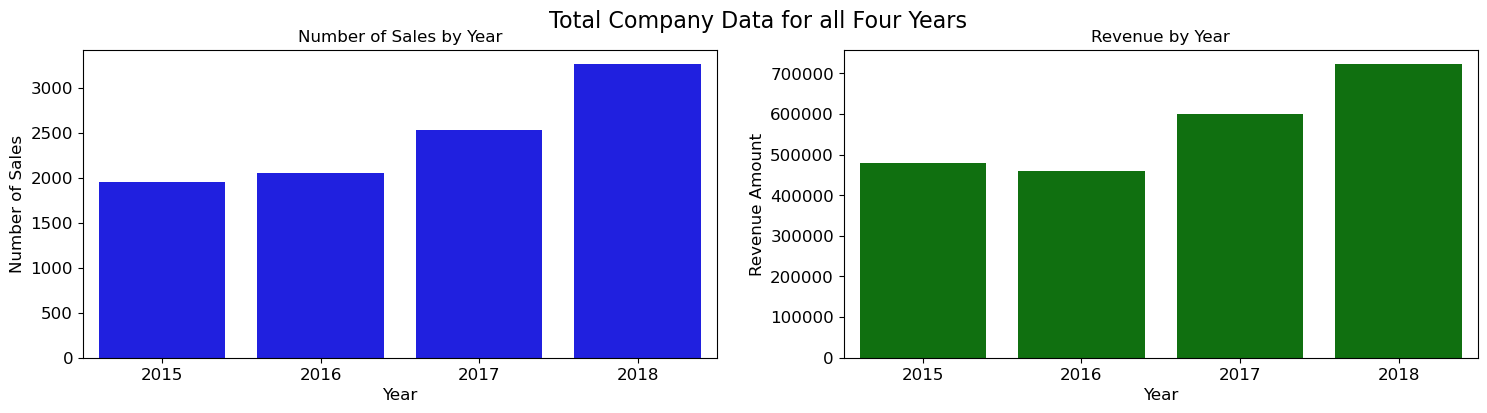

In [9]:
# Data for ALL sales data, including all years
print(
f'''Full Revenue Statistics for All Years\n
Lifetime Total Revenue: ${round(df['Revenue'].sum(),2):,.2f}
Average Lifetime Revenue: ${round(df['Revenue'].mean(),2):,.2f}
for Superstore\n''')

#Yearly Sales Aggregation Summary
yearly_sales_comp = round(df.groupby('order_year').agg({'Revenue': ['count', 'sum', 'mean']}), 2)
print(yearly_sales_comp)

#Graphing the number of sales per year
fig, axes = plt.subplots(1,2, figsize=(18,4), sharex=True)
plt.suptitle('Total Company Data for all Four Years', fontsize=16)
count_by_year= sns.barplot(data=yearly_sales_comp, x=yearly_sales_comp.index, y=('Revenue', 'count'), ax=axes[0], color = 'blue')
count_by_year.set(xlabel='Year', ylabel = 'Number of Sales', title= 'Number of Sales by Year')

#Graphing the revenue of sales per year
sum_by_year = sns.barplot(data=yearly_sales_comp, x=yearly_sales_comp.index, y=('Revenue', 'sum'), ax=axes[1],color = 'green')
sum_by_year.set(xlabel='Year', ylabel = 'Revenue Amount', title= 'Revenue by Year')

# sum_by_year.set_yticks(['100K','200K','300K','400K','500K','600K','700K'])
# count_by_year.set_yticks(['.5K','1K','1.5K','2K','2.5K','3K'])
plt.show()

Assessing the sales data year over year shows a consistant growth in consumer activity and revenue, and gives a very preliminary visual of the relationship between number of sales and revenue. The consistant growth is a promising sign, although further investigation is necessary to identify the cause of this trend, as this seems less likely to occur by accident. It might reference better marketing, more customer loyalty, or something else. One thing to note that stands out a little bit is that 2016 has more number of sales but less revenue.

The next thing to analyze is sales data by month, to check for seasonality or test for any other trends or patterns that might be insightful.

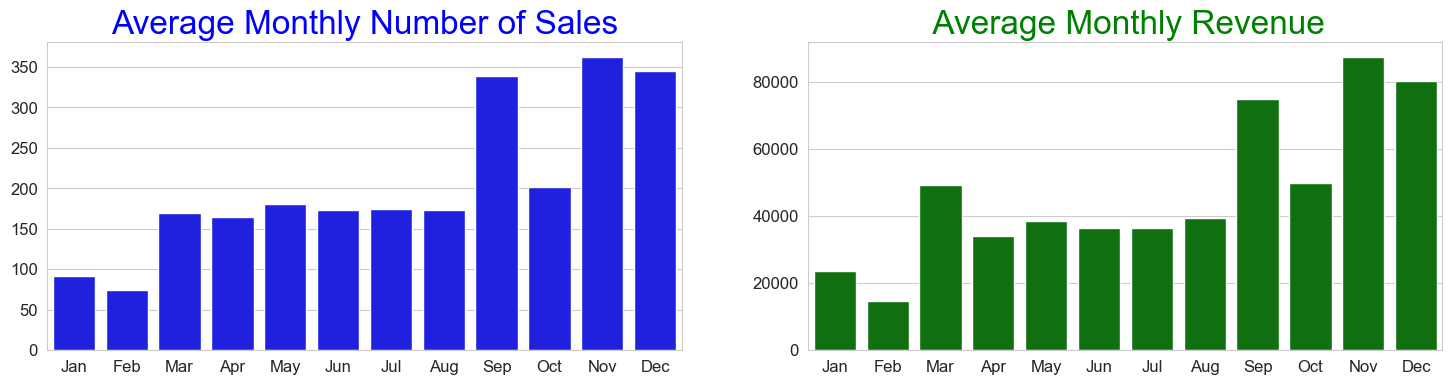

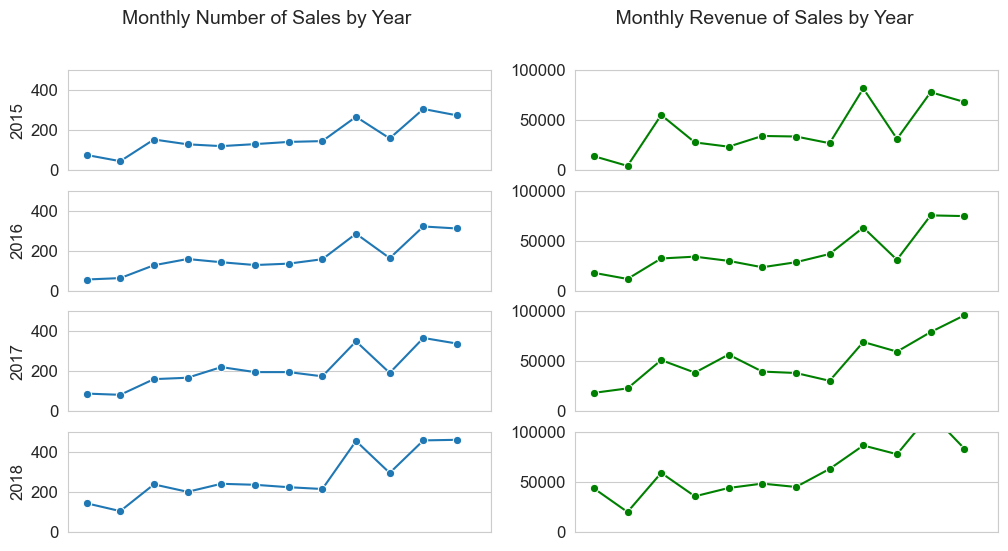

In [11]:
# Group number of sales and total sales revenue by month by year
all_years_sales_by_month = df.groupby(['order_year','order_month_n','order_month']).agg( {'Order ID':'count', 'Revenue': 'sum'}).reset_index()
avg_all_years_sales_by_month=all_years_sales_by_month.groupby(['order_month']).agg({'Order ID':'mean','Revenue':'mean'}).loc[months]

# set seaborn plotting aesthetics as default
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2, figsize=(18,4), sharex=True)

#Number of Sales by month Graph
ax1=sns.barplot(data = avg_all_years_sales_by_month, x = avg_all_years_sales_by_month.index, y = 'Order ID', ax=axes[0], color = 'blue')
ax1.set_title('Average Monthly Number of Sales', color='blue', fontdict={'fontsize':24})
ax1.set(ylabel='', xlabel='')

# Revenue by Month Graph
ax2 =sns.barplot(data = avg_all_years_sales_by_month, x = avg_all_years_sales_by_month.index, y='Revenue', ax=axes[1], color = 'green')
ax2.set(xticklabels=months_abr,ylabel='',xlabel='')
ax2.set_title(' Average Monthly Revenue', color = 'green', fontdict={'fontsize':24})
plt.show()

# Group number of sales and total sales revenue by month by year
sales_by_month = df.groupby(['order_year','order_month_n','order_month']).agg( {'Order ID':'count', 'Revenue': 'sum'}).reset_index()

#sns.set(font_scale=.9)
sns.set_style('whitegrid')
fig, axes = plt.subplots(4,2, figsize=(12,6))
plt.suptitle('Monthly Number of Sales by Year                                      Monthly Revenue of Sales by Year', fontsize=14)

#Line Graphs
years = df['order_year'].unique()
for i,year in enumerate(years):
    count_line=sns.lineplot(data = sales_by_month[sales_by_month['order_year']==year], x = 'order_month', y='Order ID',ax = axes[i,0],marker='o').set(ylabel=year, ylim=(0,500), xticks='', xlabel='')   
    rev_line=sns.lineplot(data = sales_by_month[sales_by_month['order_year']==year], x = 'order_month', y='Revenue', ax= axes[i,1], color='green', marker='o').set(ylabel='', ylim=(0,100000), xticks='',xlabel='')
plt.show()

The bar graphs display the monthly average number of sales and revenue over the span of all store data (2015-2018). That is to say, the average number of sales and revenue for all the month of January from 2015-2018 and so on for all the other months. From here, there appears to be an annual pattern with the number of sales and revenue increasing in September, November, and December.<br>
On first glance, things to keep in mind with these large increase in number of sales are certain events that might occur during those months such as "Back to School Shopping", Thanksgiving, and Winter Holidays.<br>
Another thing to note is that 2018 has the highest number of sales and highest revenue out of all the years.

The line graphs above display the monthly sales data split up by year. Reading it vertically to compare  activity year over year respectively, the number of sales(left side) has very consistent seasonality trends. Looking at the y-axis shows a slight increase in the numbers, although the general trends follows similar patterns seeing a rise in sales in the same months that coinsist with the bar graphs previously mentioned. Revenue data (right side) has less consistant patterns but the same can be said about is matching the peak month times as all the other data inspected thus far. September-December seems to bring in the highest revenue for the year with previous months/quarters varying in revenue close to $50,000 or less.

[back to index](#index)

## Sales by Geography <a id='sales_by_geo'></a>

Seeing as how the dataset is combined from several different branch locations across the US, it is important to consider sales activity in different regions and different geographic granularities. The EDA of sales by geography explores consumer activity by region, state, and city. 

#### Region

In [12]:
# Grouped Revenue and Number of Sales by Region
rev_reg = df.groupby('Region').agg({'Revenue':'sum', 'Order ID':'count'}).rename(columns={'Order ID':'Number of Sales'}).sort_values('Revenue', ascending=False)
print(rev_reg)

             Revenue  Number of Sales
Region                               
West     710219.6845             3140
East     669518.7260             2785
Central  492646.9132             2277
South    389151.4590             1598


Analyzing it by regionality shows that the West region has the highest number of sales and the highest revenue with East following close behind. Central and South are in the lower half of regions.

#### State

In [55]:
# State Revenue and Sales Calulcation
group_state = df.groupby('State').agg({'Revenue':'sum', 'Order ID':'count'}).rename(columns={'Order ID':'Number of Sales'})

# Color Palette Set Up
top_states = set(list(group_state.sort_values('Number of Sales', ascending=False).head(10).index)+list(group_state.sort_values('Revenue', ascending=False).head(10).index))
state_colors = ['#cd34b5','#5f87d1','#123eab','grey','#0000ff','gold','#9d02d7','#ffb14e','#ea5f94','#7c05b7','#000000']
state_palette= dict(zip(top_states,state_colors))

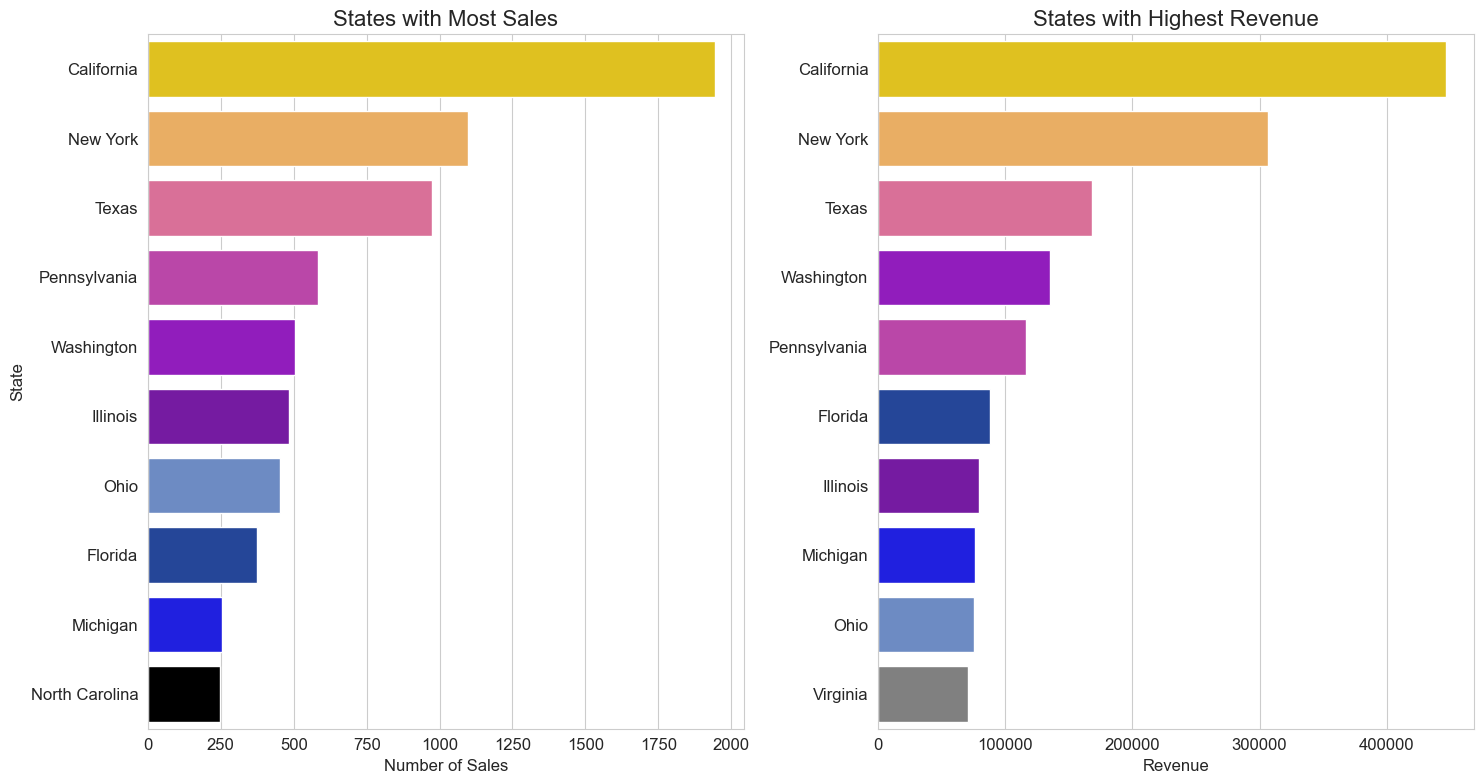

In [48]:
#Graph settings
fig, ax = plt.subplots(1,2, figsize=(15,8))
plt.rcParams['axes.facecolor'] = 'white'

#Revenue by Top 10 States Graph
plt.subplot(1,2,1)
sales_plot_state = sns.barplot(data=group_state.sort_values('Number of Sales',ascending=False).head(10),y=group_state.sort_values('Number of Sales',ascending=False).head(10).index, x='Number of Sales', orient ='h',palette = state_palette).set(xlabel='Number of Sales')
plt.title('States with Most Sales',fontsize=16)

#Number of Sales by Top 10 States Graph
plt.subplot(1,2,2)
rev_plot_state = sns.barplot(data=group_state.sort_values('Revenue', ascending=False).head(10),y=group_state.sort_values('Revenue',ascending=False).head(10).index, x='Revenue', orient='h', palette = state_palette).set(xlabel='Revenue', ylabel='')
plt.title('States with Highest Revenue',fontsize=16)
plt.tight_layout()
plt.show()

These two graphs depict the States with the highest Revenue and highest Number of Sales. An idealic relationship would suggest that states with higher number of sales will produce more revenue, implying that the same states should be represented between the two graphs. While this is true in most cases, there does exist a small disparity between the states with the highest number of sales and the states with the highest revenue.

California, New York, and Texas are consistantly the states with the most sales and the highest revenue, while the rest of the following states vary in order. A focus on marketing tactics or budget should be located to these states at first glance. The last thing to note is that Virginia appears in the Revenue graph but not in the Number of Sales graph. Consequentially, North Carolina appears on the Number of Sales graph but not in the highest revenue. <br>
This indicataes that while North Carolina has a lot of sales, they are not making a proportional amount of revenue. Vice versa, Virginia has less sales, but their revenue margins are higher than states that might be selling more objects. There are a few reasons as to why this might be happening, but further investigation should be conducted for the branches in each state. This opens potential marketing possibilities for Virginia who might be more successful in selling high priced items. On the contrary, North Carolina should be reveiwed because of their high sales but lower revenue. 

#### City

In [73]:
# City Revenue and Sales Calulcation
group_city = df.groupby('City').agg({'Revenue':'sum', 'Order ID':'count'}).rename(columns={'Order ID':'Number of Sales'})

#Setting up the top 10 cities, the color codes for each city, mapping the city to the color code
top_city =set(list(group_city.sort_values('Number of Sales', ascending=False).head(10).index)+list(group_city.sort_values('Revenue', ascending=False).head(10).index))
city_colors=['gold','#ea5f94','#5f87d1','#7c05b7','#9d02d7','gold','#123eab','gold','black','#0000ff','#ffb14e','#cd34b5']
city_palette = dict(zip(top_city, city_colors))

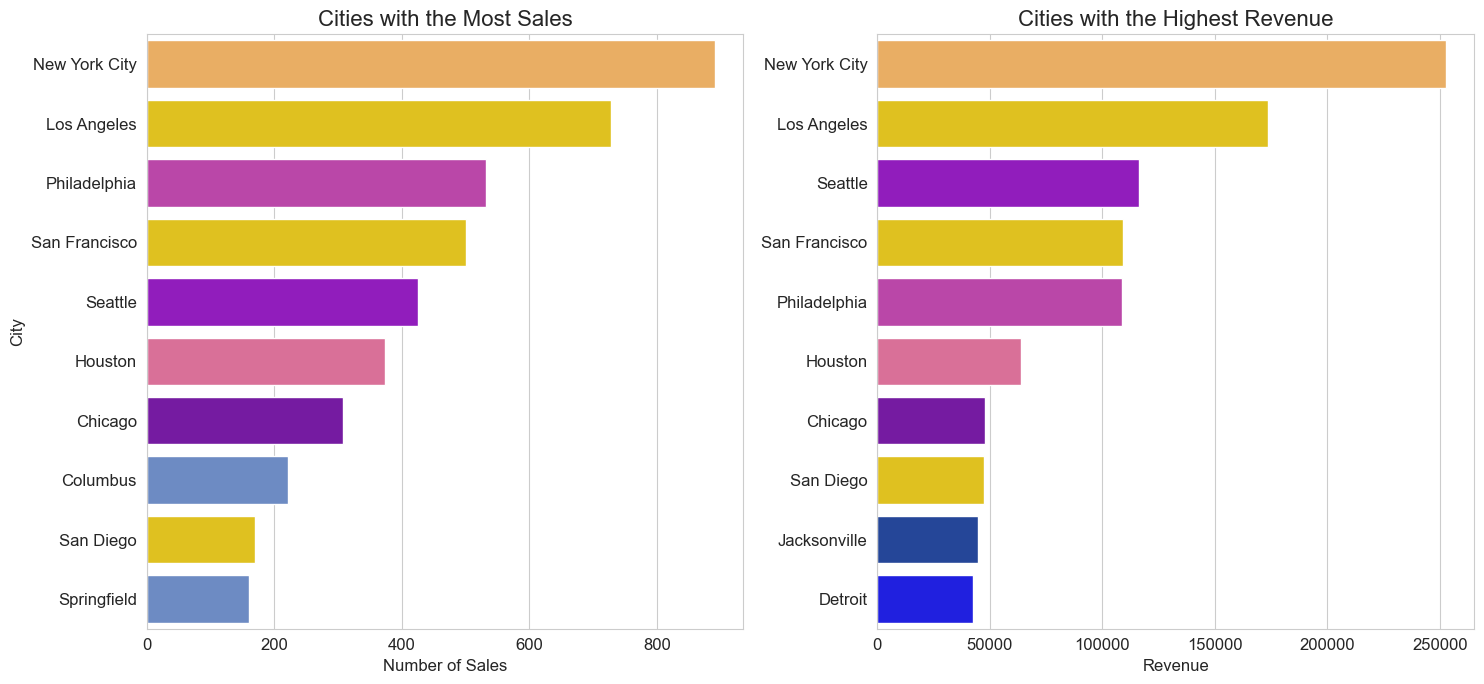

In [72]:
#Graph settings
fig, ax=plt.subplots(1,2,figsize=(15,7))
plt.rcParams['axes.facecolor'] = 'white'
#Number of Sales by Top 10 CITIES Graph
plt.subplot(1,2,1)
sales_plot_city = sns.barplot(data= group_city.sort_values('Number of Sales', ascending=False).head(10), y=group_city.sort_values('Number of Sales', ascending=False).head(10).index, x='Number of Sales', orient='h', palette = city_palette).set(ylabel='City', xlabel='Number of Sales')
plt.title('Cities with the Most Sales', fontsize=16)

#Revenue by Top 10 CITIES Graph
plt.subplot(1,2,2)
rev_plot_city = sns.barplot(data=group_city.sort_values('Revenue', ascending=False).head(10), y=group_city.sort_values('Revenue', ascending=False).head(10).index, x='Revenue', orient='h', palette=city_palette).set(xlabel='Revenue', ylabel='')
plt.title('Cities with the Highest Revenue', fontsize=16)
plt.tight_layout()
plt.show()

A similar analysis is conducted for the ciites with the highest number of sales and the highest revenue. Similar to the states, most of the cities that have the most sales also have the highest revenues, the exceptions being Columbus, Springfield, Jacksonville, and Detroit. 

Columbus and Springfield have a lot of sales but are not in the highest revenue, whereas Jacksonville and Detroit are on the list for highest revenue but not the list of the cities with the most sales. This would indivate that Jacksonville and Detroit sell items that might be more expensive while Columus and Springfield might be selling a higher quantity of products with a lower price tag.

Aside from these differences, the cities are more or less consistant between each graph and the order seems to match as well, indicating nearly a parallel relationship between sales and revenue. While the nature of this relationship is not guarnateed, it is also not a surprise to see.

[back to index](#index)

## Shipping Patterns <a id='shipping_patterns'></a>
### Shipping Demographics

In [75]:
shipping_mode=['Same Day','First Class','Second Class','Standard Class']
print(df['Ship Mode'].value_counts())

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64


Here we can see that Standard Class is the most common form of shipping mode chosen by customers.

After reveiwing sales data by geography, a quick analysis is conducted to assess if there is a relationship between the types of shipping that are used by region in the US. In other words, this analysis is testing whether certain regions are more likely to require a specific form of shipping.

### Shipping by Geography

Number of Sales by
 Region
West       3140
East       2785
Central    2277
South      1598
Name: Number of Sales, dtype: int64


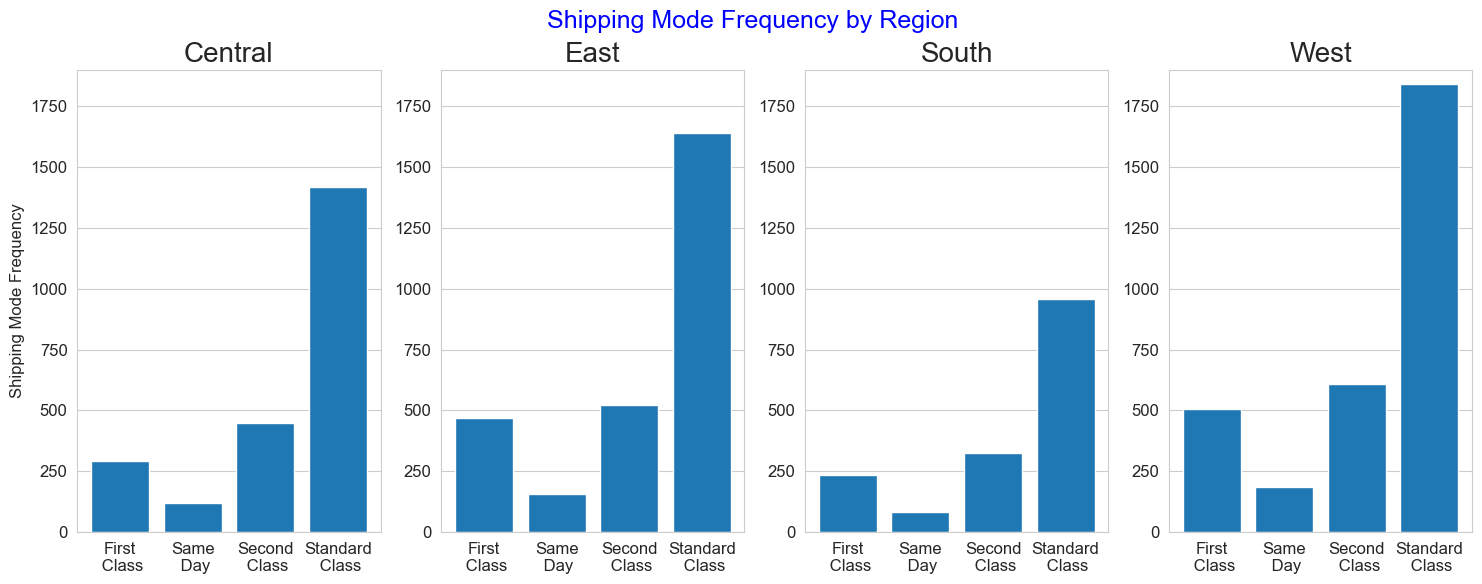

In [76]:
# Shipping method Frequency by region
shipping_by_region = df.groupby(['Region','Ship Mode']).agg({'Ship Mode':'count'}).rename(columns={'Order ID':'Number of Sales'})
shipping = ['First\n Class', 'Same\n Day','Second\n Class','Standard\n Class']
regions = df['Region'].unique()

print('Number of Sales by\n',rev_reg['Number of Sales'])

#Graphing shipping frequency per region
fig, axes = plt.subplots(1,4, figsize=(18,6))
plt.suptitle('Shipping Mode Frequency by Region', fontsize=18, color='blue')
for i in range(4):
    px = axes[i].bar(shipping, shipping_by_region.loc[regions[i]]['Ship Mode'])
    axes[i].set(title=regions[i], ylim=(0,1900))
    axes[i].title.set_size(20)
    axes[i].tick_params(labelsize=12)
    axes[i].grid(axis='x')
    if i==0:
        axes[i].set(ylabel='Shipping Mode Frequency')

The bar graph above shows very proportional usage of shipping methods in each region. Popularity of shipping methods is inversely parallel with the price of shipping, with the cheapest shipping method being purchased the most and the most expensive form of shipping being purchased the least. This pattern is seen for all regions, which indicates that no region has specific shipping needs that differ from the other.

To further test simimlarity, the same information of shipping method by region is plotted below, but the y-axis labels the percentage instead of the frequency. The graph visualizes the percentage of sales are purchased with the specified shipping method for the entire region. Standard Class accounts for about 60% of shipping for sales in ALL regions, Second Class accounts for roughly 20%, First Class from 15-18%, and Same day shipping is used for less than 10% of sales.

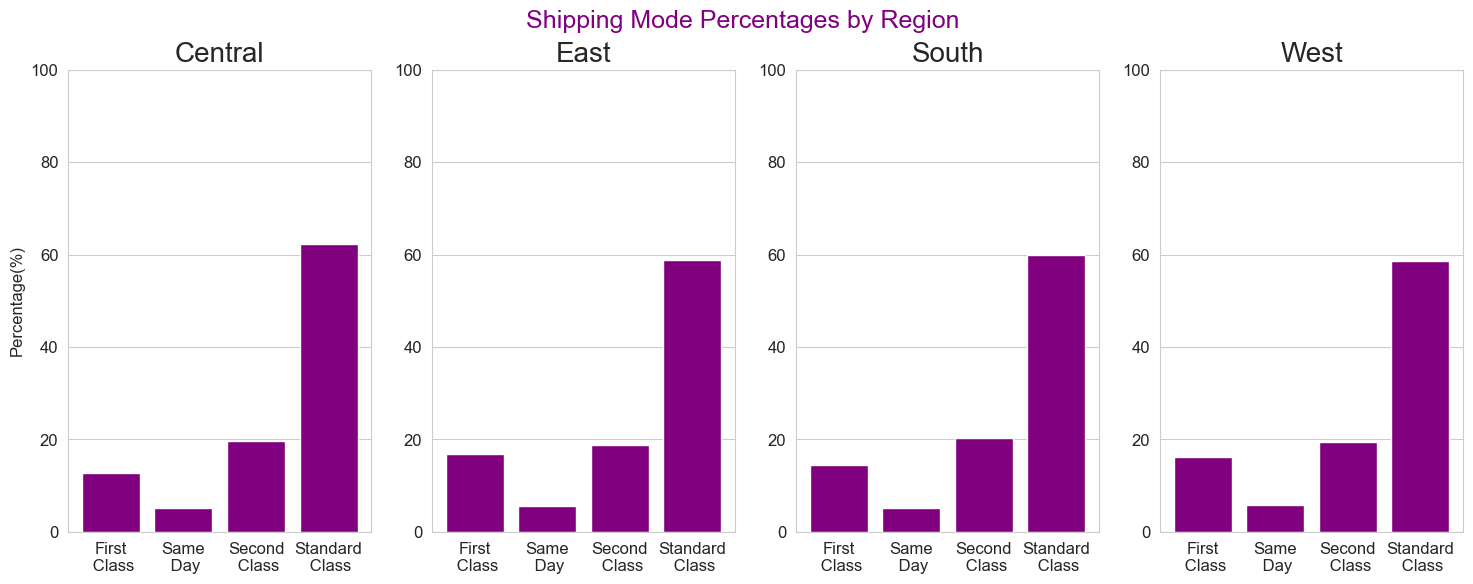

In [77]:
# Shipping Method Percentage by Region
shipping_by_region_prct=pd.DataFrame(df[['Region','Ship Mode']].groupby(['Region']).value_counts(normalize=True), columns=['Ship Mode Frequency']).sort_index()
shipping_by_region_prct['Ship Mode Frequency']=round(shipping_by_region_prct['Ship Mode Frequency']*100,2)

#Graphing porportion of shipping method per region
fig, axes = plt.subplots(1,4, figsize=(18,6))
plt.suptitle('Shipping Mode Percentages by Region', fontsize=18, color='purple')
for i in range(4):
    px = axes[i].bar(shipping, shipping_by_region_prct.loc[regions[i]]['Ship Mode Frequency'], color='purple')
    axes[i].set(title=regions[i], ylim=(0,100))
    axes[i].title.set_size(20)
    axes[i].tick_params(labelsize=12)
    axes[i].grid(axis='x')
    if i==0:
        axes[i].set(ylabel='Percentage(%)')

To account for the different number of sales in each region, the proportional percentages of each shipping method used in each region was also calculated. The output is similar from the previous graph, where the percentage usage of most shipping methods is nearly identicle across regions. Standard class accounts for around 60% of shipping, followed by second class which accounts for another 20%, then first class around 15% and lastly same class at less than 10%. This information is helpful in answering the initial question, which is to say that no specific region relies on a certain method of shipping their purchased products. All shipping methods are equally used in each region.



### Shipping Over Time

While the usage of each shipping method is parallel across regions, the last thing to investigate is the usage of shipping methods over time. This seeks to answer the question if certain shipping methods see a spike in frequency at any given or specific time in the year. The average number of sales for each month is calculated for each shipping method and graphed over the span of a year. The results are shown below.

In [113]:
# Time series of different shipping method
shipping_by_date = df.groupby(['Ship Mode','order_year','order_month','order_month_n']).agg({'Order ID':'count'}).sort_values(['Ship Mode','order_month_n'])
shipping_month_avg=shipping_by_date.groupby(['Ship Mode','order_month','order_month_n']).agg({'Order ID':'mean'}).sort_values(['Ship Mode','order_month_n']).rename(columns={'Order ID':'Number of Sales'}).reset_index('order_month_n')

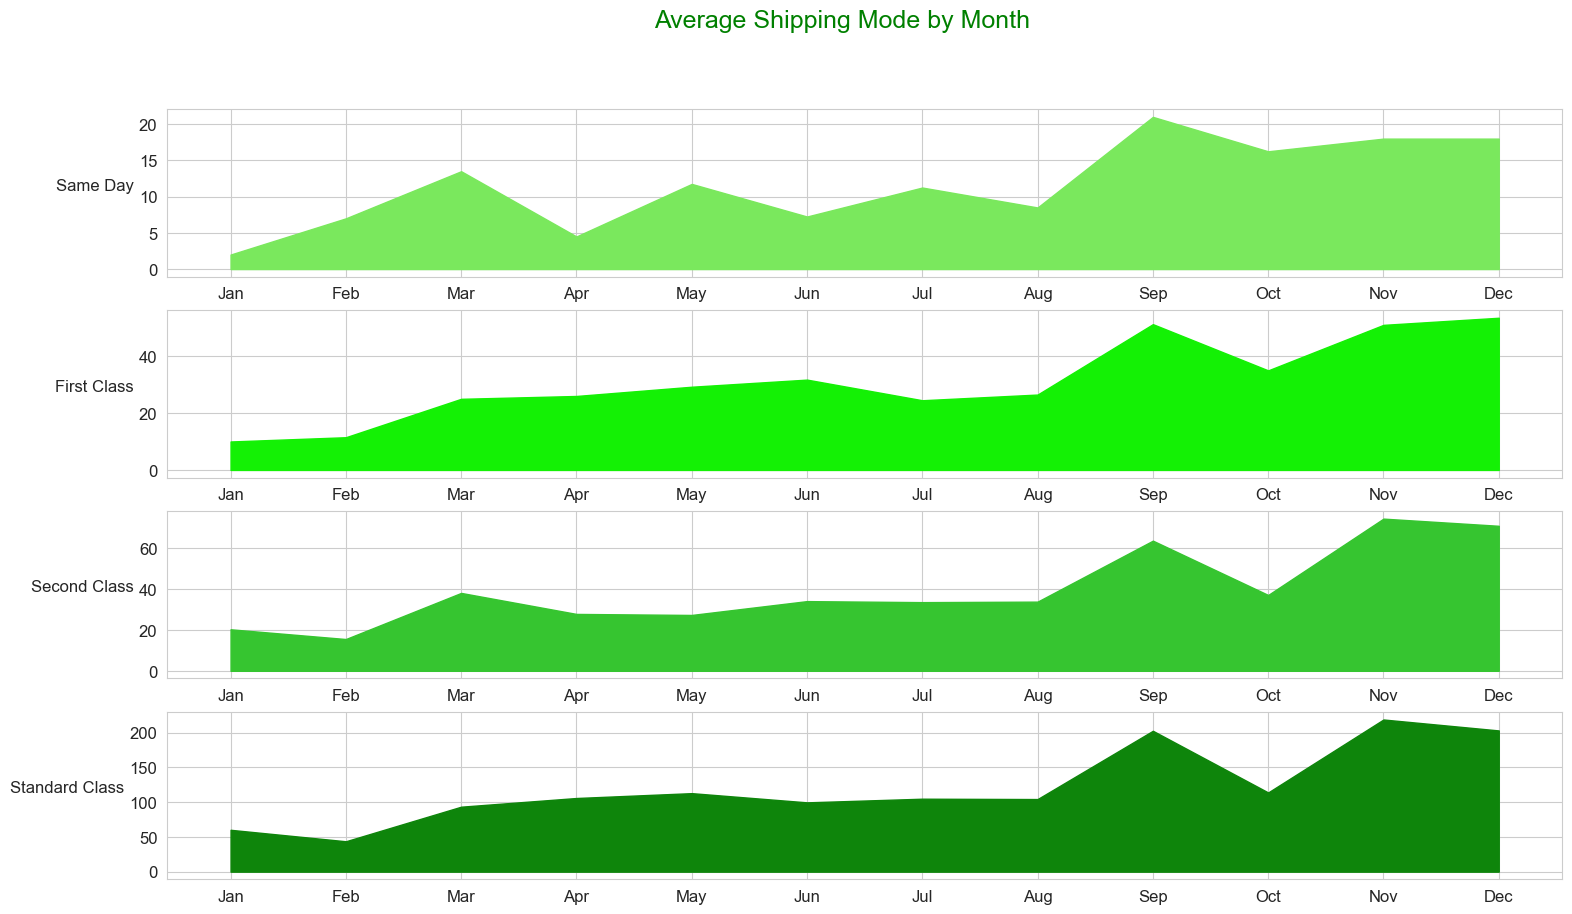

In [116]:
#Graphing the time series of each shipping
fig, axes = plt.subplots(4,1, figsize=(18,10))
plt.suptitle('Average Shipping Mode by Month', fontsize=18, color='green')

ship_colors=["#7ae85d","#14f105","#36c530","#0e850b"]
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.fill_between(months_abr,shipping_month_avg.loc[shipping_mode[i]]['Number of Sales'],color=ship_colors[i])
    plt.ylabel(shipping_mode[i], rotation='horizontal', ha='right')
plt.show()

From the graph above, all shipping methods experience a spike in orders around September, a small drop in October, then it picks up again in November and December. This trend correlates to the order pattern from the regular number of orders earlier in this analysis. September, October, and December having trends of higher orders might indicate high necessity and therefore a need for a quick turn around time. However, the shipping methods used in this time seem proportional to the frequency of use seen in the rest of the year or during the non-busy seasons. This is helpful to understand that, although certain months are busier than others, the rise in orders does not cause a rise in faster shipping methods. All shipping methods are still proportionally utilized during the months that see higher orders.

When thinking of certain instances where same day shipping might be most at demand, one might often think of last minute shopping or last minute gifts. Given the knowledge that the winter season is bountiful with holidays of all kinds of backgrounds, one might predict that December would be a month with increased saem day or first class shipping. Interestingly enough, same day shipping sees it's highest use in September, and first class shipping sees the same usage between all the busy months (September, November, December).

In [129]:
# Most Frequent Shipping Method in the States with the Most Number of Sales
test = pd.DataFrame(df[df['State'].isin(top_states)][['State','Ship Mode','Order ID']]).groupby(['State','Ship Mode']).agg({'Order ID':'count'}).reset_index('Ship Mode')
print(test.groupby(test.index).max())

                     Ship Mode  Order ID
State                                   
California      Standard Class      1129
Florida         Standard Class       225
Illinois        Standard Class       292
Michigan        Standard Class       166
New York        Standard Class       659
North Carolina  Standard Class       154
Ohio            Standard Class       224
Pennsylvania    Standard Class       367
Texas           Standard Class       597
Virginia        Standard Class       126
Washington      Standard Class       293


The chart above identifies what shipping method is most popular amongst the states previously recorded as having the highest number of sales in the US. With the information that these states produce the most purchase activity, it is also insightful to know what shipping method is paired with the purhcases from these states. 

Looking into it further, the most frequent shipping method used in the states with the highest number of sales was Standard Class.

[back to index](#index)

## Inventory Category and Subcategory <a id ='category_subcategory'></a>

### Category

In [9]:
# Category Summary Table
cat_sum_tab=df.groupby('Category').agg({'Order ID':'count','Revenue':'sum'}).rename(columns={'Order ID':'Number of Sales'}).sort_values('Revenue', ascending=False)
print('Category Summary Table\n',cat_sum_tab)

Category Summary Table
                  Number of Sales      Revenue
Category                                     
Technology                  1813  827455.8730
Furniture                   2078  728658.5757
Office Supplies             5909  705422.3340


Taking a simple aggregation of the number of orders and the total revenue by each category shows that Technology has the highest Revenue, but the lowest number of sales. This would indicate that althought they have less sales, the products in this category cost more.

Office supplies on the contrary has nearly 3x the number of technology sales, but has a lower overall revenue. Office supplies is the most frequently bought category although has the lowest incoming revenue. 

<br>
The chart below visualizes the average revenue by month seen by each category.

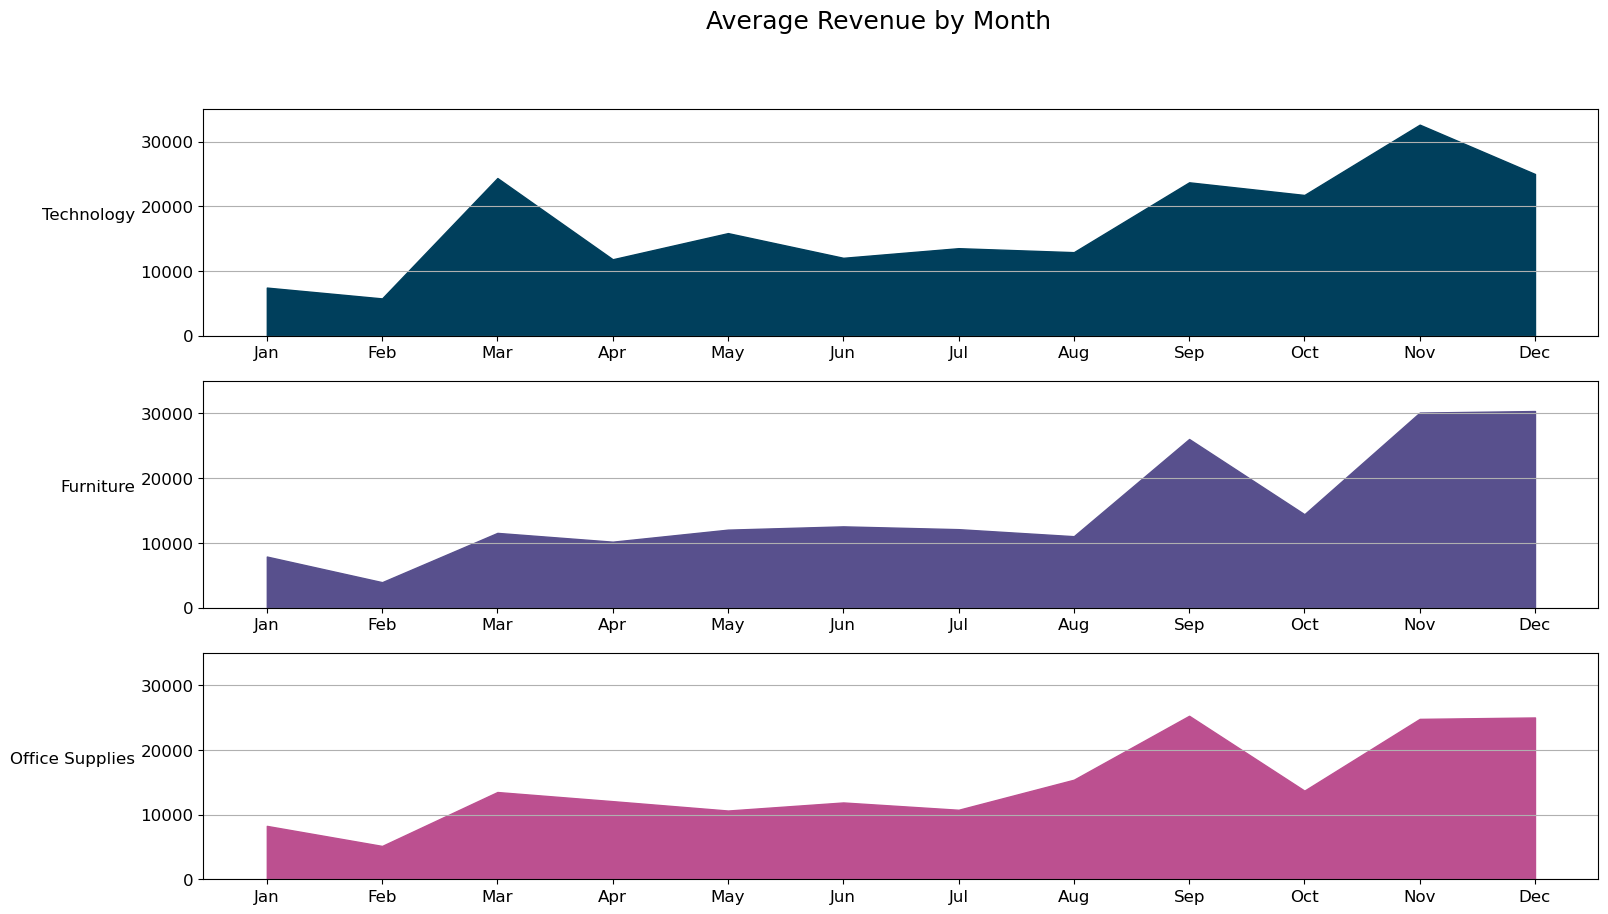

In [10]:
#Graphing the time series of purhcases for each category
fig, axes = plt.subplots(3,1, figsize=(18,10))
plt.suptitle('Average Revenue by Month', fontsize=18)

category_sales = df.groupby(['Category','order_year','order_month_n','order_month']).agg( {'Order ID':'count', 'Revenue': 'sum'}).reset_index()
cat_avg_sale = category_sales.groupby(['Category','order_month','order_month_n']).agg({'Order ID':'mean','Revenue':'mean'}).sort_values(['Category','order_month_n'])


cat_colors=["#003f5c","#58508d","#bc5090"]

for i in range(len(cat_sum_tab.index)):
    plt.rc('axes', axisbelow=True)
    plt.subplot(3,1,i+1)
    plt.grid(axis='y')
    plt.fill_between(months_abr,cat_avg_sale.loc[cat_sum_tab.index[i]]['Revenue'],color=cat_colors[i])
    plt.ylabel(cat_sum_tab.index[i], rotation='horizontal', ha='right')
    plt.ylim(0,35000)
    
plt.show()

Similar to other time series graphs in this analysis, there is an increase in activity in September, November, and December. By this time, this sort of pattern is not a surprise to see. The one category that differs slightly is the technology category which sees a large increase in activity in March. Additionally, it sees a peak month of revenue in November while the other categories see parallel revenue across September, November, and December. This is the first time March has shown any deviations in purhcase activity and would be something to consider especially with the technology inventory.

Now with a grand overview of the category behavior, the next factor is to consider the sales on the subcategory level.


### Subcategory

In [11]:
# Sub-category Summary Table sorted by Revenue
subcategory_count = df.groupby(['Category','Sub-Category']).agg({'Order ID':'count','Revenue':'sum'}).rename(columns={'Order ID':'Number of Sales'}).sort_values(['Category','Revenue'],ascending=False)
display(subcategory_count)

Number of Sales      Revenue
Category        Sub-Category                              
Technology      Phones                    876  327782.4480
                Machines                  115  189238.6310
                Accessories               756  164186.7000
                Copiers                    66  146248.0940
Office Supplies Storage                   832  219343.3920
                Binders                  1492  200028.7850
                Appliances                459  104618.4030
                Paper                    1338   76828.3040
                Supplies                  184   46420.3080
                Art                       785   26705.4100
                Envelopes                 248   16128.0460
                Labels                    357   12347.7260
                Fasteners                 214    3001.9600
Furniture       Chairs                    607  322822.7310
                Tables                    314  202810.6280
                Bookcases                 226  113813.1987
                Furnishings               931   89212.0180

Further investigation into purchase activity on the subcategory level can provide more context on what items or products are most popular or generate the highest revenue. Above is a table containing the number of sales and the total revenue for the  subcategories in each category.

In the technology category, phones produce the highest revenue and the most number of sales out of the 4 subcategories listed. Copiers have the lowest number of sales and provide the lowest amount of revenue. This is  not to say that copiers are not selling well and the company should stop, but can also be a factor of product longevity. It becomes difficult to make a full comparison with ambiguous subcategory names such as machines and accessories.

The top subcategory in Office supplies is Office storage which holds decently high sales, but paper and binders are by far the most frequently bought items from the whole inventory list. Office storage sells less items but has a higher revenue, indicatinga higher price than binders or paper. The same can be said for Office Appliances, it sells less items than binders and paper but still accumulates a large sum of revenue. Additional subcategories like Art, Envelopes, Labels, and Fasteners have trailing number of sales and revenue.

Lastly, furniture is composed ot 4 subcategories: Chairs, Tables, Bookcases, and a more ambiguous subcategory, Furnishings. In this category, tables and chairs provide the highest revenue, although furnishings sells the  most number of products. It is unknown if tables and chairs are sold in a package deal, but the number of chair sold is double the amount of tables. This could possibly hint at a package deal of 1 table and 2 chairs, but is is just as likely that people would want to buy individual chairs or even more than 2 chairs, so the idea of a package deal is just spectualtion. The subcategory title furnishings has the highest number of sales but has the lowest total revenue in the furniture category. This implies that the furnishings subcategory contains lower priced products that is meant to support the structure or functionality of larger furniture items. 

A closer look at these subcategories is shown in the bar graphs below which will show the most popular subcategories in all categories, and the subcategories that accumulate the most revenue. The line graphs show a timeline of the average number of products or the average amount of revenue for each month in the year. Graphs colored in green represent the number of sales, graphs colored in salmon/pink/red represent the revenue. 

The bar graphs highlight specific subcategories that are currently excelling in the respective cateogory (sales or revenue) and is important for the company to keep tabs on sales activity.

The time series line graphs helps indicated at what time in the year the subcategory might be most popular or most in need. This will be helpful in case sales spike at random times.

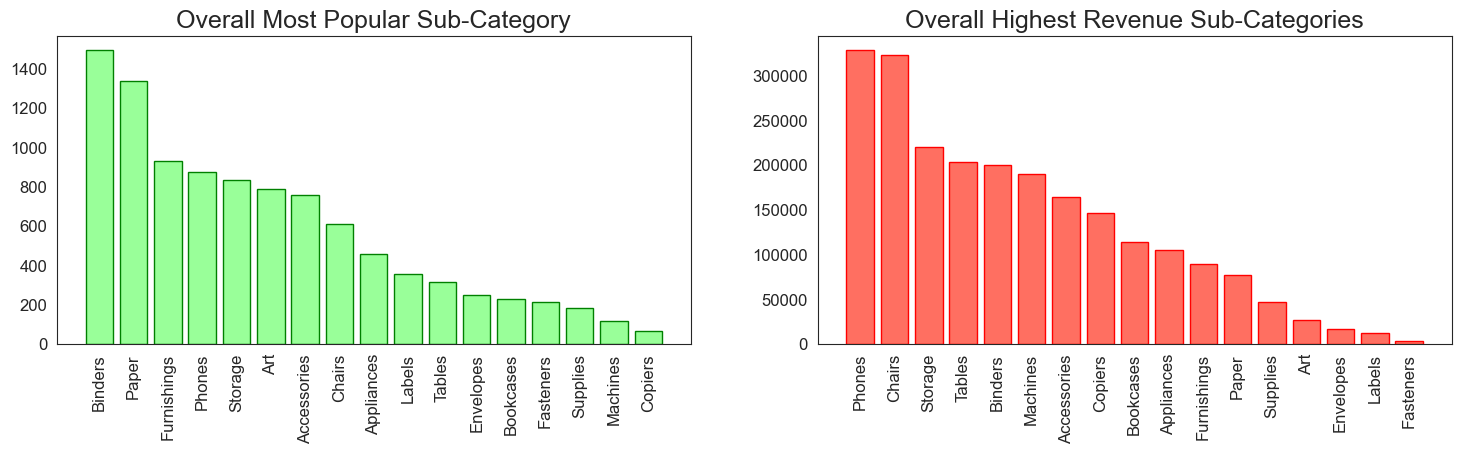

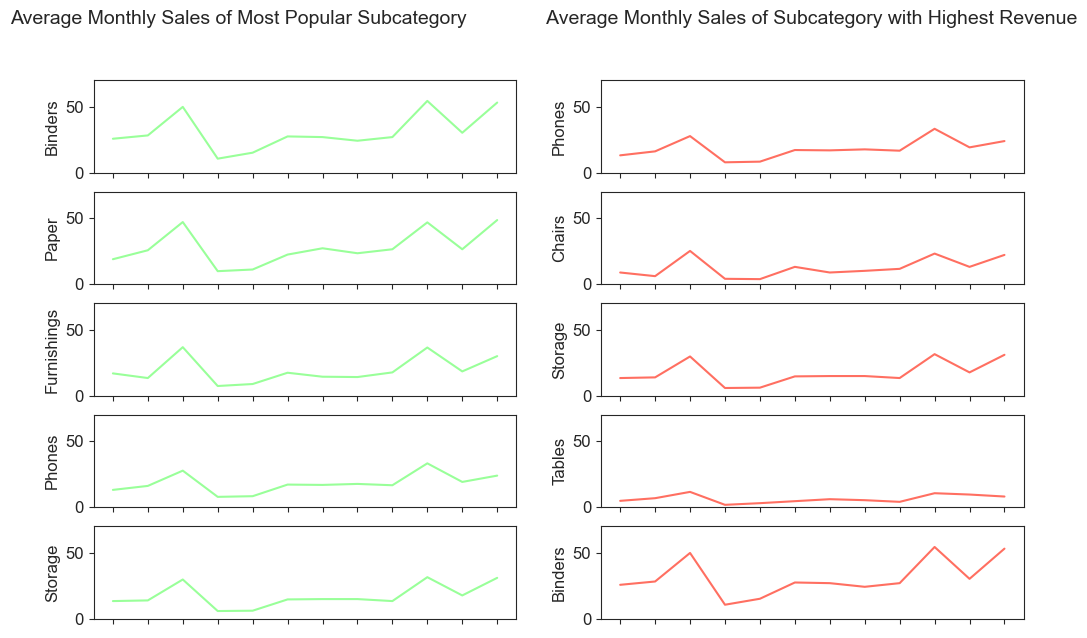

In [12]:
# Calculating highest category and subcategory
subcategory_count = df.groupby(['Category','Sub-Category']).agg({'Order ID':'count','Revenue':'sum'}).rename(columns={'Order ID':'Number of Sales'}).sort_values(['Category','Revenue'],ascending=False)

subcategory_count=subcategory_count.reset_index('Sub-Category')
sns.set_style('white')
fig, axes = plt.subplots(1,2, figsize=(18,4))

# Most Sold Sub-Categories Graph
plt.subplot(1,2,1)
g1=plt.bar(subcategory_count.sort_values('Number of Sales', ascending=False)['Sub-Category'], subcategory_count.sort_values('Number of Sales', ascending=False)['Number of Sales'],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xticks(rotation=90)
plt.title('Overall Most Popular Sub-Category', fontsize=18)

# Highest Revenue Subcategories Graph
plt.subplot(1,2,2)
g2=plt.bar(subcategory_count.sort_values('Revenue', ascending=False)['Sub-Category'], subcategory_count.sort_values('Revenue', ascending=False)['Revenue'],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xticks(rotation=90)
plt.title('Overall Highest Revenue Sub-Categories', fontsize=18)

# Time series of sales for most popular items
subcats_most_popular=['Binders', 'Paper','Furnishings','Phones','Storage']
subcat_timeseries_most_popular = df[df['Sub-Category'].isin(subcats_most_popular)].groupby(['order_year','order_month_n', 'order_month', 'Sub-Category']).agg({'Order ID':'count'}).rename(columns={'Order ID': 'Number of Purchases'}).reset_index(['order_month_n', 'order_month','Sub-Category'])

# Time series of sales for highest revenue items
subcats_highest_rev = ['Phones','Chairs','Storage','Tables','Binders']
subcat_timeseries_highest_rev = df[df['Sub-Category'].isin(subcats_highest_rev)].groupby(['order_year','order_month_n', 'order_month', 'Sub-Category']).agg({'Order ID':'count'}).rename(columns={'Order ID':'Number of Purchases'}).reset_index(['order_month_n', 'order_month','Sub-Category'])

# Graphing
sns.set_style('ticks')


fig, axes = plt.subplots(5,2, figsize=(12,7))
plt.suptitle('Average Monthly Sales of Most Popular Subcategory               Average Monthly Sales of Subcategory with Highest Revenue', fontsize=14)
for i,j in enumerate(range(1,11,2)):
    plt.subplot(5,2,j)
    sns.lineplot(data = subcat_timeseries_most_popular[subcat_timeseries_most_popular['Sub-Category']==subcats_most_popular[i]].groupby(['order_month']).agg({'Number of Purchases':'mean'}), x = 'order_month', y='Number of Purchases', color='#99ff99').set(ylabel=subcats_most_popular[i], ylim=(0,70), xticklabels='',xlabel='')
plt.show()
for k,l in enumerate(range(2,12,2)):
    plt.subplot(5,2,l)
    sns.lineplot(data = subcat_timeseries_highest_rev[subcat_timeseries_highest_rev['Sub-Category']==subcats_highest_rev[k]].groupby(['order_month']).agg({'Number of Purchases':'mean'}), x = 'order_month', y='Number of Purchases', color='#FF6F61').set(ylabel=subcats_highest_rev[k], ylim=(0,70), xticklabels='',xlabel='', title='')
plt.show()

By looking at the number of purcases for each category, there's a significantly large lead of sales in the Office supplies category, likely due to the fact that they have double the number of subcategories in comparison to the other categories. With the knowledge that office supplies are the most popular category, these can also explain the boost in Revenue and purchases seen in September earlier in this report.

The graphs show that Binders and Paper are the most frequently bought items, however Binders only produce the 5th most revenue and Paper is not in the Top 10 subcategories of highest revenue. The subcategories that produce the highest revenue lie in the Tech and Furniture category.


### Top Products in Sub-Category
Now that the most popular categories and subcategories have been analyzed, the last and most granular level is to look at the actual top selling products or products that contribute the most revenue. Between the most sold subcategory items [Paper, Furnishings, Binders], the product names are listed below to give a more comprehensive example to the company what specific items are being bought the most. A similar display is also created for the subcategory items that make up the highest revenue [Storage, Phones, and Chairs].

In [13]:
#Highest Selling Product names by top subcategory
top_products= df[df['Sub-Category'].isin(['Binders','Paper','Furnishings'])].groupby(['Sub-Category', 'Product Name']).agg({'Product Name':'count'}).rename(columns={'Product Name':'Number of Sales'}).sort_values(['Sub-Category','Number of Sales'], ascending=False).reset_index()
top_products=top_products.groupby('Sub-Category').head(3).set_index(['Sub-Category', 'Product Name'])         #head only works if there are no indexes
display('Items with the Most Sales in most Popular Subcategory',top_products)

#Highest Revenue Product names by top subcategory
high_rev_products = df[df['Sub-Category'].isin(['Phones','Chairs','Storage'])].groupby(['Sub-Category', 'Product Name']).agg({'Product Name':'count'}).rename(columns={'Product Name':'Number of Sales'}).sort_values(['Sub-Category','Number of Sales'], ascending=False).reset_index()
high_rev_products=high_rev_products.groupby('Sub-Category').head(3).set_index(['Sub-Category','Product Name'])         #head only works if there are no indexes
display('Most Sold Items Amonst Subcategories that Contribute the Most Revenue',high_rev_products)

'Items with the Most Sales in most Popular Subcategory'

Number of Sales
Sub-Category Product Name                                                       
Paper        Easy-staple paper                                                44
             Xerox 1881                                                       12
             Xerox 1893                                                       11
Furnishings  Staple-based wall hangings                                       16
             Eldon Wave Desk Accessories                                      14
             Eldon Expressions Wood Desk Accessories, Oak                     11
Binders      Avery Non-Stick Binders                                          20
             Storex Dura Pro Binders                                          17
             GBC Premium Transparent Covers with Diagonal Li...               14

'Most Sold Items Amonst Subcategories that Contribute the Most Revenue'

Number of Sales
Sub-Category Product Name                                                       
Storage      Hot File 7-Pocket, Floor Stand                                   13
             Carina Double Wide Media Storage Towers in Natu...               12
             Fellowes Bankers Box Stor/Drawer Steel Plus                      12
Phones       Geemarc AmpliPOWER60                                             11
             AT&T 17929 Lendline Telephone                                    10
             I Need's 3d Hello Kitty Hybrid Silicone Case Co...               10
Chairs       Situations Contoured Folding Chairs, 4/Set                       15
             Global High-Back Leather Tilter, Burgundy                        14
             Global Wood Trimmed Manager's Task Chair, Khaki                  14

The item that is sold the most is easy-staple paper and Non Stick Binders. Combined with the previous graphs above, it is also known that general paper and binder sales spike during March and September.

The items sold that contributed to the highest revenue are from the chairs subcategory which is a folding chair (4 piece set) followed closely by a black leather chair and a manager's task chair.

### Category by Shipping Method
Another factor to consider is if certain shipping modes are more likely to be used with certain categories. For instance, perhaps technology is typically ordered last minute or when something is need of desperate replacement, and would typically be ordered with same day shipping. A similar or contrasting statement can be made for any category. To look into this matter further, the table below shows the frequency of shipping mode used for each category.

In [42]:
#Category by Shipping Method
display(pd.DataFrame(df.groupby('Category')['Category','Ship Mode'].value_counts(ascending=False, normalize=True)*100, columns=['Frequency (%)']))

C:\Users\liana.principe\AppData\Local\Temp\ipykernel_3920\1042448318.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  display(pd.DataFrame(df.groupby('Category')['Category','Ship Mode'].value_counts(ascending=False, normalize=True)*100, columns=['Frequency (%)']))


Frequency (%)
Category        Ship Mode                    
Furniture       Standard Class      59.095284
                Second Class        19.923003
                First Class         15.303176
                Same Day             5.678537
Office Supplies Standard Class      60.433237
                Second Class        19.106448
                First Class         14.994077
                Same Day             5.466238
Technology      Standard Class      58.466630
                Second Class        19.801434
                First Class         16.381688
                Same Day             5.350248

The results are similar to the shipping method graphs composed in the shipping by geography section. The shipping mode used in each category is very porportional, hinting that no one category exhibits special behavior in shipping activity over the others. 

Another factor to consider is if there are specific subcategories that are being shipped within Same Day and First Class Shipping. The table below looks at all Same Day and First Class shipping and identifies which top 10 subcategories were purchased with that order.

In [47]:
#Top subcategories bought with same day shipping
same_day_subcat = pd.DataFrame(df[df['Ship Mode']=='Same Day'].groupby(['Ship Mode','Sub-Category']).agg({'Order ID':'count'}).head(10).sort_values('Order ID', ascending=False).rename(columns={'Order ID':'Number of Sales'}))
display('Same Day Shippping:',same_day_subcat)

#Top subcategories bought with first class shipping
first_class_subcat = pd.DataFrame(df[df['Ship Mode']=='First Class'].groupby(['Ship Mode','Sub-Category']).agg({'Order ID':'count'}).head(10).sort_values('Order ID', ascending=False).rename(columns={'Order ID': 'Number of Sales'}))
display('First Class Shippping:',first_class_subcat)


'Same Day Shippping:'

Number of Sales
Ship Mode Sub-Category                 
Same Day  Binders                    74
          Furnishings                51
          Accessories                41
          Chairs                     39
          Art                        35
          Appliances                 23
          Envelopes                  14
          Fasteners                  14
          Bookcases                   7
          Copiers                     4

'First Class Shippping:'

Number of Sales
Ship Mode   Sub-Category                 
First Class Binders                   230
            Furnishings               140
            Accessories               127
            Art                       110
            Chairs                     83
            Appliances                 76
            Bookcases                  48
            Envelopes                  31
            Fasteners                  30
            Copiers                    12

The results above show that the items most bought with Same Day or First Class shipping match the subcategories that have the highest number of sales previously reported on. Binders, Furnishings, and Accessories are most ordered with Same Day and/or First Class shipping, which is more likely a result of them being the most frequently bought items rather than those items being considered highly necesssary or specialized. 

When considering the total number of binders ordered, those purchased with Same Day shipping only represents a small percentage. There is no obvious pattern to predict what items will be used with Same Day shipping by itself, although more data on purhcase activity over time may hold more insights.

[back to index](#index)

## Customer Segment <a id='customer_seg'></a>
Customer Segment is helpful in deciphering the type of customer making the purchase and the type of environment it will be used for: regular consumer, corporate, or home office. Analyzing the customer segment is an important step in analyzing and understanding the customer marketing pool. The data shows that general consumers are the biggest consumer audience for this superstore, followed by corporate.

The next thing to look into is the type or category of purchases each customer segment is making to answer the question if one segment is only buying from one speciifc category.

In [ ]:
print(df.value_counts('Segment'))

#### Segment by Category

In [59]:
#Number of sales per category per customer segment
segment_cat_count = df.groupby(['Segment', 'Category']).agg({'Revenue':'sum'}).sort_values(['Segment','Revenue'], ascending=False)

#Total revenue per category per customer segment
segment_cat_rev = df.groupby(['Segment', 'Category']).agg({'Order ID':'count'}).rename(columns={'Order ID':'Number of Sales'}).sort_values(['Segment','Number of Sales'], ascending=False)
print(segment_cat_count,'\n\n', segment_cat_rev)

Segment
Consumer       5101
Corporate      2953
Home Office    1746
dtype: int64
Segment
Consumer       5101
Corporate      2953
Home Office    1746
dtype: int64 

                                  Revenue
Segment     Category                    
Home Office Technology       182402.3710
            Office Supplies  121939.1900
            Furniture        120640.6159
Corporate   Technology       244041.8370
            Office Supplies  224130.5360
            Furniture        220321.7018
Consumer    Technology       401011.6650
            Furniture        387696.2580
            Office Supplies  359352.6080 

                              Number of Sales
Segment     Category                        
Home Office Office Supplies             1054
            Furniture                    357
            Technology                   335
Corporate   Office Supplies             1783
            Furniture                    628
            Technology                   542
Consumer    Office Su

The top categories that bring in the most revenue for each Customer Segment is Technology which can most likely be attributed to the higher prices of technology products. When looking at the frequency of products bought by each segment, this is confirmed by the fact that techology has the lowest number of sales. 

Following this, Home Offices and Corporate segments contribute the most revenue for Office Supplies then Furniture respectively. Consumers spend more money on Furniture than they do on Office Supplies. 

Setting aside the metrics from a revenue standpoint, Office Supplies is still the most frequently bought category. A similar analysis is conducted for consumer segment purchases by subcategories. The tables below report on number of sales and revenue.

#### Segment by Subcategory

In [74]:
#Number of sales per sub-category per customer segment
segment_subcat_count = df.groupby(['Segment', 'Sub-Category']).agg({'Revenue':'sum'}).sort_values(['Segment','Revenue'], ascending=False)

#Total revenue per sub-category per customer segment
segment_subcat_rev = df.groupby(['Segment', 'Sub-Category']).agg({'Order ID':'count'}).rename(columns={'Order ID':'Number of Sales'}).sort_values(['Segment','Number of Sales'], ascending=False)
display(segment_subcat_count,'\n\n', segment_subcat_rev)

                              Revenue
Segment     Sub-Category             
Home Office Phones         68209.1500
            Chairs         56445.4830
            Machines       49419.0510
            Storage        42584.7640
            Tables         35829.4315
            Binders        32929.8890
            Copiers        32879.5740
            Accessories    31894.5960
            Appliances     18080.7970
            Paper          17819.6180
            Furnishings    16507.8240
            Bookcases      11857.8774
            Art             4116.9740
            Envelopes       2698.6180
            Labels          1675.4040
            Supplies        1489.4580
            Fasteners        543.6680
Corporate   Chairs         95203.1520
            Phones         90342.6660
            Storage        77975.3980
            Tables         67133.3815
            Machines       60276.7550
            Binders        50006.9870
            Copiers        46829.3860
            

The EDA in this customer segment section is purely a preliminary process and further information about the customer, the audience, and the market will be the main goal of this project continuing forward.

# Appendix

The appendix is comprised of certain functions that can pull descriptive statistics of specific years and compare them with the greater performance of purhcase data at the superstore. This portion is interactive and the user can look at specific years or run the function on several entries.

In [17]:
# Calls out the yearly sum, yearly average, month with the lowest sale, and month with the highest sale
# The table identifies the count, total, average, minimum, and maximum sale values each month in the specified year of the function

def summary_stat(year):
    sum_stat = round(df.Revenue[df['order_year'] == year].describe(), 2)
    sum_sale = sum(df.Revenue[df['order_year'] == year])
    print('{} Revenue Summary Statistics:\n'.format(year))
    print('Total Revenue {}: ${:,.2f}'.format(year, sum_sale))
    print('Average of {} Revenue: ${:,.2f}\n'.format(year, sum_stat[1]))
    stat_summary = round(df.Revenue[df['order_year'] == year].describe(), 2)
    print(stat_summary)
    temp1 = round(df[df.order_year == year].groupby('order_month_n').agg({'Revenue': ['count', 'sum', 'mean', 'min', 'max']}), 2)
    
    max_i = temp1[('Revenue', 'sum')].idxmax()
    max_2018 = (max(temp1[('Revenue', 'sum')]))
    min_i = temp1[('Revenue', 'sum')].idxmin()
    min_2018 = (min(temp1[('Revenue', 'sum')]))
    print('\nLowest Revenue Month: {} with ${:,.2f}'.format(months[min_i-1], min_2018))
    print('Highest Revenue Month: {} with ${:,.2f}\n'.format(months[max_i-1], max_2018))
    plt.figure().set_figwidth(14)
    plt.plot(temp1.index,temp1[('Revenue', 'sum')], marker = 'o')
    plt.xticks(range(1,13),months)
    plt.xlabel('Month')
    plt.ylabel('Revenue Amount')
    plt.title(str(year)+' Average Monthly Revenue', fontsize=18)
    return temp1
    plt.show()

In [ ]:
summary_stat(2017)

In [48]:
# The user decides what % change they want to see (number of sales vs sales revenue) to compare across the years in the data

def year_percent_change():
    question = input('Do you want the percentage change for number of\n a)number of sales\n b)sales revenue\nPlease enter a or b:')
    metric=''
    new_column_title=''
    if question.lower() == 'a':
        metric = 'count'
        new_column_title = 'Number of sales % change'
    elif question.lower() =='b':
        metric = 'sum'
        new_column_title = 'Sales revenue % change'
    else:
        question = input('Please enter a or b: ')
    sale_year_pcnt_change = round(df.groupby('order_year').agg({'Revenue': [metric]}), 2)
    pcnt_change=round((sale_year_pcnt_change[('Revenue', metric)].pct_change())*100, 2)
    sale_year_pcnt_change[new_column_title]=pcnt_change
    print(sale_year_pcnt_change.columns)
    plt.figure().set_figwidth(5)
    plt.plot(sale_year_pcnt_change.index, sale_year_pcnt_change[(new_column_title,    '')], marker = 'o')
    plt.xlabel('Year')
    plt.xticks([2015,2016,2017,2018])
    plt.ylabel('Sales Amount (%)')
    plt.title('YOY '+ new_column_title, fontsize=18)
    return sale_year_pcnt_change
    plt.show()
    # MAKE TIMELINE GRAPH OF 2 LINES

In [ ]:
print(year_percent_change())

In [54]:
#The user decides what % change they want to see (number of sales vs sales revenue) for each month in the specified year
def month_percent_change(year):
    question = input('Do you want the percentage change for number of\n a)number of sales\n b)sales revenue\nPlease enter a or b:')
    metric=''
    new_column_title=''
    if question.lower() == 'a':
        metric = 'count'
        new_column_title = 'Number of sales % change'
    elif question.lower() =='b':
        metric = 'sum'
        new_column_title = 'Sales revenue % change'
    else:
        question = input('Please enter a or b: ')
    month_percent_change_df = round(df[df.order_year == year].groupby('order_month_n').agg({'Revenue': [metric]}), 2)
    pcnt_change=round((month_percent_change_df[('Revenue', metric)].pct_change())*100, 2)
    month_percent_change_df[new_column_title]=pcnt_change
    
    sale_year_pcnt_change = round(df.groupby('order_year').agg({'Revenue': [metric]}), 2)
    pcnt_change=round((sale_year_pcnt_change[('Revenue', metric)].pct_change())*100, 2)
    sale_year_pcnt_change[new_column_title]=pcnt_change
    
    plt.figure(figsize=(18,18))
    month_g = plt.subplot2grid(shape=(4, 3), loc=(0, 0), colspan=2)
    year_g = plt.subplot2grid(shape=(4, 3), loc=(0, 1), colspan=1)
    
    month_g.plot(month_percent_change_df.index,month_percent_change_df[(new_column_title,    '')], marker = 'o')
    plt.xticks(range(1,13),months)
    plt.xlabel('Month')
    plt.ylabel(metric + 'of Revenue')
    plt.title(str(year)+ ' '+new_column_title, fontsize=18)
    
    year_g.plot(sale_year_pcnt_change.index, sale_year_pcnt_change[(new_column_title,    '')], marker = 'o')
    plt.xlabel('Year')
    plt.xticks([2015,2016,2017,2018])
    plt.ylabel('Sales Amount')
    plt.title('YOY '+ new_column_title, fontsize=18)


    return month_percent_change_df
    plt.show()
# MAKE TIMELINE GRAPH WITH 2 LINES

In [ ]:
print(month_percent_change(2018))